# 1. Regression on California Housing Prices

Part 1 will examine a scikit-learn dataset on California housing statistics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing

Start by getting the dataset and dump everything into a variable `d`.

In [2]:
d = fetch_california_housing()

This returns a dictionary object. The keys tell us what segregated information is available.

In [3]:
print d.keys()

['data', 'feature_names', 'DESCR', 'target']


The `DESCR` key has information about the dataset.

In [4]:
print d.DESCR

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




The **target variable** is treated as a dependent variable, and is of interest in this dataset.

The **input variables** are treated as independent variables.

In [5]:
data = pd.DataFrame(d.data,
                    columns=d.feature_names)

**NOTE:** The target data is home values, and has dimensions of dollars(?)

In [6]:
target = pd.Series(d.target)

In [7]:
'''
data = {
    'target': dtarget,
    'input': dframe
}
'''

"\ndata = {\n    'target': dtarget,\n    'input': dframe\n}\n"

## a. Univariate Distribution

A univariate distribution is like a histogram--it shows the frequency of values for a single variable.

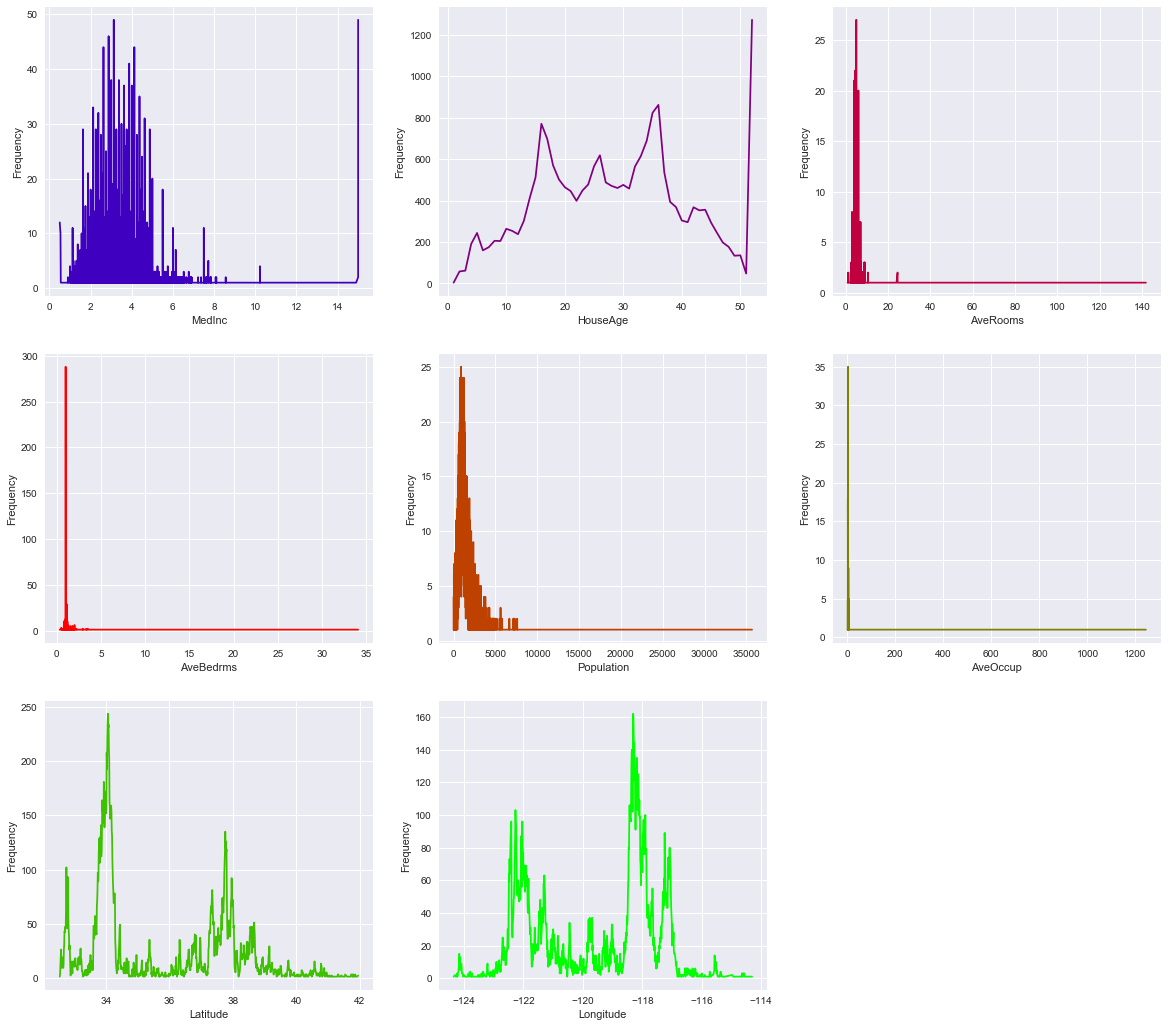

In [56]:
import seaborn as sb
sb.set()
plt.figure(0, figsize = (20, 50))

i = 0
for col in data.columns:
    i += 1
    
    plt.subplot(data.columns.size, 3, i)
    plt.plot(data[col].value_counts().sort_index(), color = plt.cm.brg(i * 256 / 8))
    plt.xlabel(col)
    plt.ylabel("Frequency")

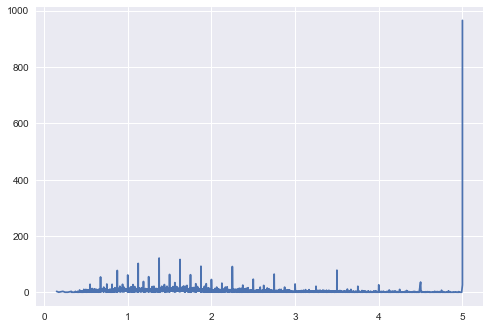

In [9]:
plt.figure(1)

plt.plot(target.value_counts().sort_index())

The plots above basically demonstrate where there will be large quantities of data clumped together, and where data will be reasonably well spread out. `HouseAge`, for example, is quite well-distributed and will more likely reveal significant trends. In contrast, `AveOccup` is not well-distributed. Because most homes only have a few occupants, but some few homes have many occupants, there are some outlying data points that will make trends in the bulk of the data look less significant because of scale.

My guess is that the best way to address this is to omit outlying data, to get a better scale for the bulk of the data.

## b. Feature Dependency

For each of the input features, we visualize the target data's dependency on the feature data.

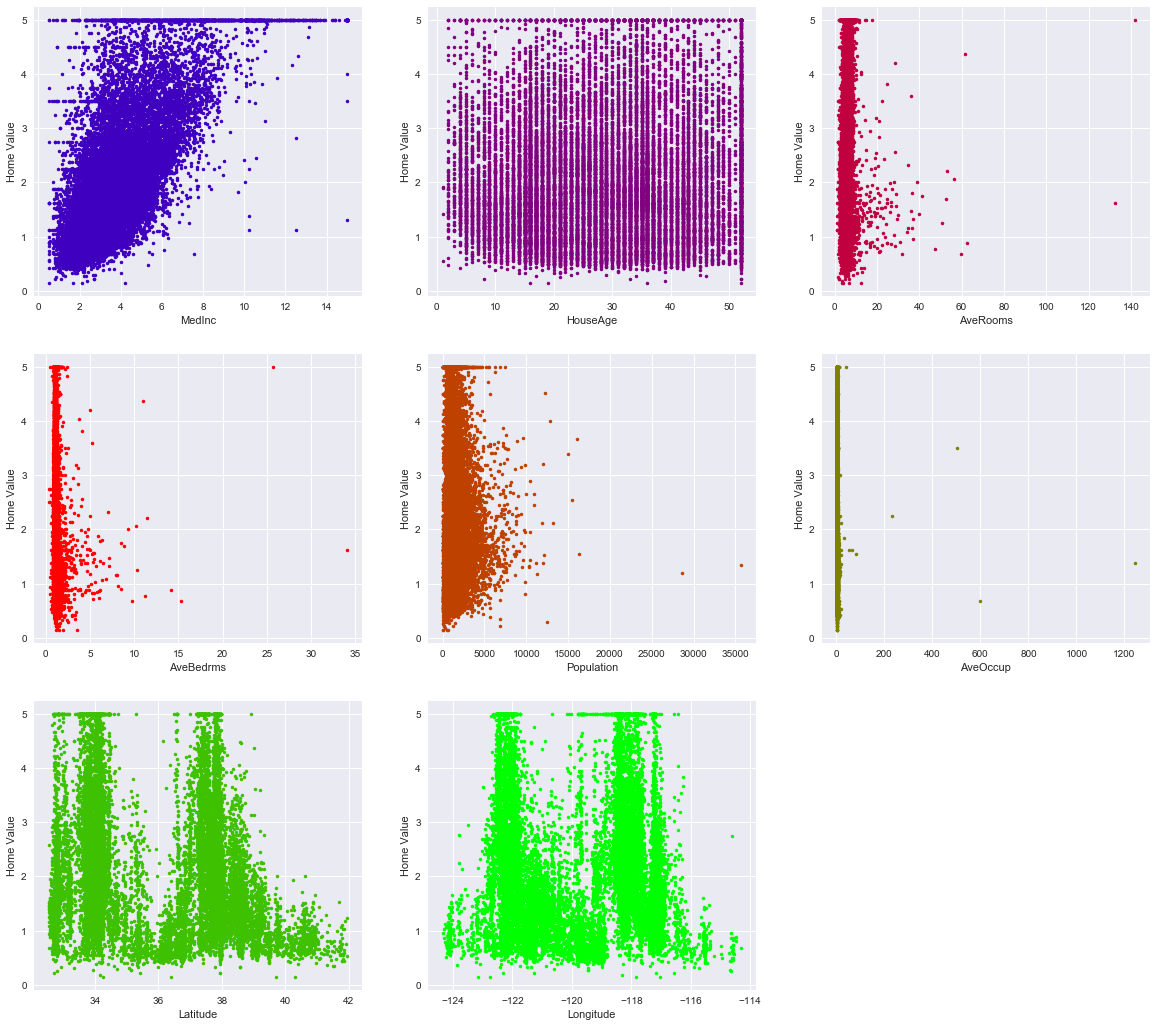

In [10]:
plt.figure(2, figsize = (20, 50))

# Subplot index
i = 0

# Plot each column of input features against the target data
for col in data.columns:
    i += 1
    
    plt.subplot(data.columns.size, 3, i)
    plt.plot(data[col], 
             target, 
             '.',
             color = plt.cm.brg(i * 256 / 8))
    plt.xlabel(col)
    plt.ylabel("Home Value")

## c. Evaluating Regression with Scikit-Learn

Using machine learning tools, we'll try a few different models and "train" them by tuning parameters. In order to train the model and verify its accuracy across trials, we split all the data up into "train" and "test" sets using `train_test_split`.

In [11]:
# Do we even need this step when using cv.cross_val_predict ?
import sklearn.model_selection as cv
feaTrain, feaTest, targeTrain, targeTest = cv.train_test_split(data, target,
                                                              random_state = 253)

Then, we can use Scikit-Learn's linear model module to perform various linear regressions, and evaluate the results using cross validation.

In [12]:
import sklearn.linear_model as lin
import sklearn.metrics as metrics

### Linear Regression (OLS)

In [13]:
model_ols = lin.LinearRegression()
score_ols = cv.cross_val_score(model_ols, data, target)

print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

OLS Accuracy: 0.58 (+/- 0.03)


### Ridge

In [14]:
model_ridge = lin.Ridge()
score_ridge = cv.cross_val_score(model_ridge, data, target)

print("Ridge Accuracy: %0.2f (+/- %0.2f)" % (score_ridge.mean(), score_ridge.std() * 2))

Ridge Accuracy: 0.58 (+/- 0.03)


### Lasso

In [15]:
model_lasso = lin.Lasso()
score_lasso = cv.cross_val_score(model_lasso, data, target)

print("Lasso Accuracy: %0.2f (+/- %0.2f)" % (score_lasso.mean(), score_lasso.std() * 2))

Lasso Accuracy: 0.26 (+/- 0.05)


### ElasticNet

In [16]:
model_elasticnet = lin.ElasticNet()
score_elasticnet = cv.cross_val_score(model_elasticnet, data, target)

print("ElasticNet Accuracy: %0.2f (+/- %0.2f)" % (score_elasticnet.mean(), score_elasticnet.std() * 2))

ElasticNet Accuracy: 0.40 (+/- 0.03)


None of these methods seem particularly great, but OLS and Ridge definitely come out on top.

### With Scaled Data

Many estimators don't perform well with unscaled data, so let's see if any of our previous methods get better when we input scaled data. Here, we use `sklearn.preprocessing.StandardScaler()` to scale data.

In [17]:
import sklearn.preprocessing as prep

scaler = prep.StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

#### Did I scale the data right?
I have no idea! Let's make a plot.

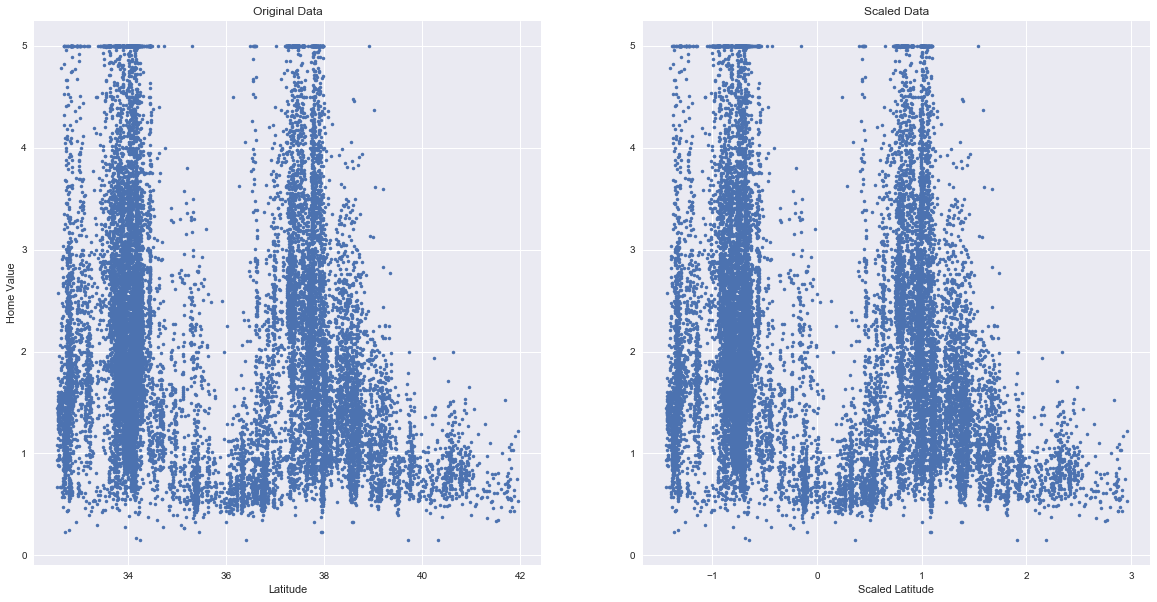

In [18]:
plt.figure(3, figsize = (20, 10))

plt.subplot(121)
plt.title("Original Data")
plt.xlabel("Latitude")
plt.ylabel("Home Value")
plt.plot(data['Latitude'], target, '.')

pd_scaled_data = pd.DataFrame(scaled_data, 
                              columns = d.feature_names)

plt.subplot(122)
plt.title("Scaled Data")
plt.xlabel("Scaled Latitude")
plt.plot(pd_scaled_data['Latitude'], target, '.')

plt.show()

Those plots look pretty well the same to my eye, so I'll trust the scaling of the data for now.

#### Linear Regression (OLS)

In [19]:
model_ols = lin.LinearRegression()
score_ols = cv.cross_val_score(model_ols, scaled_data, target)

print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

OLS Accuracy: 0.58 (+/- 0.03)


#### Ridge

In [20]:
model_ridge = lin.Ridge()
score_ridge = cv.cross_val_score(model_ridge, scaled_data, target)

print("Ridge Accuracy: %0.2f (+/- %0.2f)" % (score_ridge.mean(), score_ridge.std() * 2))

Ridge Accuracy: 0.58 (+/- 0.03)


#### Lasso

In [21]:
model_lasso = lin.Lasso()
score_lasso = cv.cross_val_score(model_lasso, scaled_data, target)

print("Lasso Accuracy: %0.2f (+/- %0.2f)" % (score_lasso.mean(), score_lasso.std() * 2))

Lasso Accuracy: -0.01 (+/- 0.02)


#### ElasticNet

In [22]:
model_elasticnet = lin.ElasticNet()
score_elasticnet = cv.cross_val_score(model_elasticnet, scaled_data, target)

print("ElasticNet Accuracy: %0.2f (+/- %0.2f)" % (score_elasticnet.mean(), score_elasticnet.std() * 2))

ElasticNet Accuracy: 0.19 (+/- 0.05)


If I've done my data scaling correctly it appears that OLS and Ridge are unaffected by data scaling, while Lasso and ElasticNet perform significantly worse with scaled data. I'm not sure what -1% accuracy means for the Lasso estimator.

## d. Finding the Best Parameters with GridSearchCV

`GridSearchCV` is an sklearn tool that will fit and score models continuously over a range of parameters to find the best fit. It will return things like the best parameters, best estimator, scores, etc.

Grid search takes a dictionary that defines the range of parameters to try. After defining the parameter grid, we can have grid search fit for each of the models we used above and determine what the best one is.

But what are the parameters for the estimators we used above?

According to scikit-learn documentation, **Linear Regression** takes only a boolean `fit_intercept`

#### Ridge

In [82]:
grid_ridge = cv.GridSearchCV(lin.Ridge(), param_grid = {
    'fit_intercept': [False, True],
    'alpha': np.linspace(0, 10, 100)
})
grid_ridge.fit(scaled_data, target)

print "BEST FIT: " + str(grid_ridge.best_estimator_)
print "BEST SCORE: %0.2f" % grid_ridge.best_score_

BEST FIT: Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
BEST SCORE: 0.58


#### Lasso

Documentation advises not to allow `alpha = 0` for Lasso.

In [38]:
grid_lasso = cv.GridSearchCV(lin.Lasso(), param_grid = {
    'fit_intercept': [False, True],
    'alpha': np.linspace(10, 0, endpoint = False)
})
grid_lasso.fit(scaled_data, target)

print "BEST FIT: " + str(grid_lasso.best_estimator_)
print "BEST SCORE: %0.2f" % grid_lasso.best_score_

BEST FIT: Lasso(alpha=0.1999999999999993, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
BEST SCORE: 0.44


Still, optimal `alpha` approaches 0.

#### ElasticNet

ElasticNet also advises not to use `alpha = 0`, and adds an additional parameter for us to try.

In [47]:
grid_elastic = cv.GridSearchCV(lin.ElasticNet(precompute = True), param_grid = {
    'fit_intercept': [False, True],
    'alpha': np.linspace(10, 0, endpoint = False),
    'l1_ratio': np.linspace(0, 1)
}, n_jobs = -1)
grid_elastic.fit(scaled_data, target)

print "BEST FIT: " + str(grid_elastic.best_estimator_)
print "BEST SCORE: %0.2f" % grid_elastic.best_score_

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


BEST FIT: ElasticNet(alpha=0.1999999999999993, copy_X=True, fit_intercept=True,
      l1_ratio=0.0, max_iter=1000, normalize=False, positive=False,
      precompute=True, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
BEST SCORE: 0.50


/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


### Dependence of CV Score on Parameters

#### Ridge

In [83]:
gs_ridge = pd.DataFrame(grid_ridge.cv_results_)
gs_ridge

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_fit_intercept,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004004,0.000858,-3.543492,-2.446518,0,False,"{u'alpha': 0.0, u'fit_intercept': False}",200,-2.931527,-2.588071,-3.793747,-2.299460,-3.905201,-2.452023,0.000222,1.697113e-05,0.435110,0.117889
1,0.005174,0.001191,0.576282,0.610395,0,True,"{u'alpha': 0.0, u'fit_intercept': True}",1,0.555021,0.620594,0.588378,0.610676,0.585446,0.599915,0.000374,3.519004e-04,0.015081,0.008445
2,0.005318,0.000996,-3.543431,-2.446518,0.10101,False,"{u'alpha': 0.10101010101010101, u'fit_intercep...",199,-2.931492,-2.588071,-3.793683,-2.299460,-3.905117,-2.452023,0.000632,1.711533e-04,0.435091,0.117889
3,0.004085,0.000730,0.576281,0.610395,0.10101,True,"{u'alpha': 0.10101010101010101, u'fit_intercep...",2,0.555024,0.620594,0.588380,0.610676,0.585440,0.599915,0.000246,1.136156e-04,0.015079,0.008445
4,0.003278,0.000661,-3.543370,-2.446518,0.20202,False,"{u'alpha': 0.20202020202020202, u'fit_intercep...",198,-2.931457,-2.588071,-3.793619,-2.299460,-3.905034,-2.452023,0.000102,3.397332e-05,0.435072,0.117889
5,0.003985,0.000607,0.576281,0.610395,0.20202,True,"{u'alpha': 0.20202020202020202, u'fit_intercep...",3,0.555027,0.620594,0.588382,0.610676,0.585434,0.599915,0.000171,4.512491e-06,0.015077,0.008445
6,0.003145,0.000614,-3.543309,-2.446518,0.30303,False,"{u'alpha': 0.30303030303030304, u'fit_intercep...",197,-2.931421,-2.588071,-3.793555,-2.299460,-3.904950,-2.452023,0.000031,5.756162e-06,0.435053,0.117889
7,0.003835,0.000596,0.576280,0.610395,0.30303,True,"{u'alpha': 0.30303030303030304, u'fit_intercep...",4,0.555030,0.620594,0.588383,0.610676,0.585428,0.599915,0.000041,0.000000e+00,0.015074,0.008445
8,0.003143,0.000632,-3.543247,-2.446518,0.40404,False,"{u'alpha': 0.40404040404040403, u'fit_intercep...",196,-2.931386,-2.588071,-3.793490,-2.299460,-3.904866,-2.452023,0.000013,1.870265e-05,0.435034,0.117889
9,0.003883,0.000623,0.576280,0.610395,0.40404,True,"{u'alpha': 0.40404040404040403, u'fit_intercep...",5,0.555033,0.620594,0.588385,0.610676,0.585422,0.599915,0.000046,2.881897e-05,0.015072,0.008445


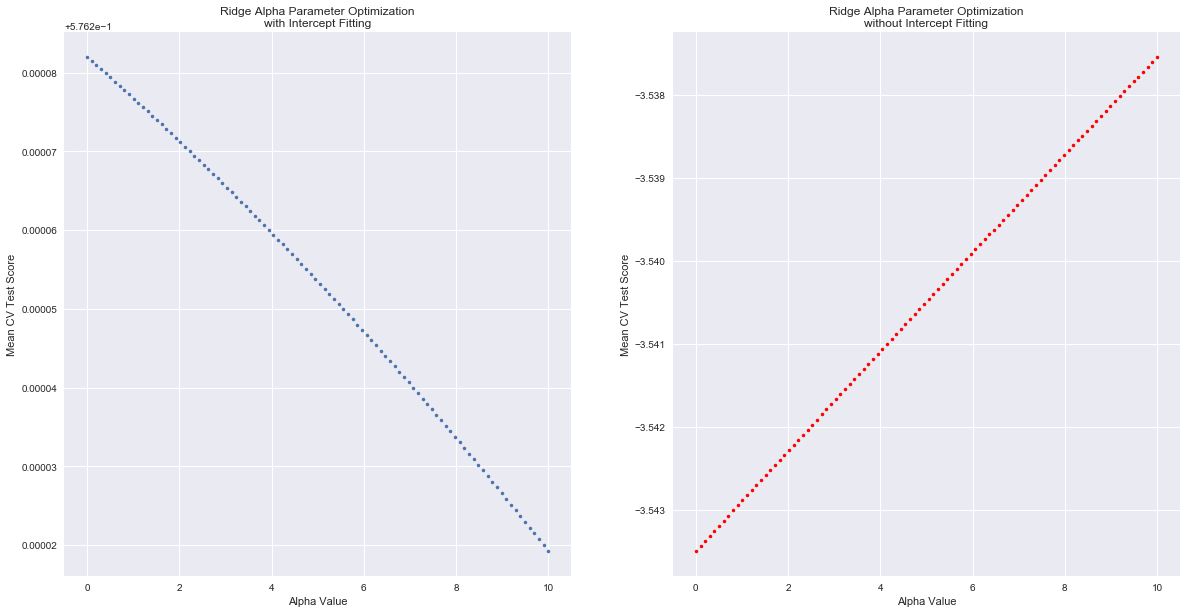

In [84]:
plt.figure(4, figsize = (20, 10))

plt.subplot(121)
plt.title("Ridge Alpha Parameter Optimization\nwith Intercept Fitting")
plt.xlabel("Alpha Value")
plt.ylabel("Mean CV Test Score")
plt.plot(gs_ridge.loc[gs_ridge.param_fit_intercept == True, ['param_alpha']],
         gs_ridge.loc[gs_ridge.param_fit_intercept == True, ['mean_test_score']],
         '.',
         label = "fit_intercept == True")

plt.subplot(122)
plt.title("Ridge Alpha Parameter Optimization\nwithout Intercept Fitting")
plt.xlabel("Alpha Value")
plt.ylabel("Mean CV Test Score")
plt.plot(gs_ridge.loc[gs_ridge.param_fit_intercept == False, ['param_alpha']],
         gs_ridge.loc[gs_ridge.param_fit_intercept == False, ['mean_test_score']],
         '.',
         label = "fit_intercept == False",
         color = plt.cm.brg(128))

Clearly intercept fitting is preferable for this dataset using Ridge estimation, and the test scores are maximized as `alpha` approaches 0.